<a href="https://colab.research.google.com/github/tsyet12/Pgraph/blob/main/examples/P_graph_Example_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install git+https://github.com/tsyet12/Pgraph --quiet

In [3]:
!pip install Chemsy --quiet

In [4]:
#import all libraries
from Pgraph.Pgraph import Pgraph #This is our Pgraph library
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from chemsy.predict import *
from sklearn.preprocessing import MinMaxScaler

In [5]:
#Make a basic Partial Least Squares Supervised Learning Model

diabetes = load_diabetes() #load data
X, y = diabetes.data, diabetes.target
xscaler=MinMaxScaler() # scale data between 0 to 1
yscaler=MinMaxScaler()

X=xscaler.fit_transform(X) #scale
y=yscaler.fit_transform(y.reshape(-1, 1))

model=PartialLeastSquaresCV() #partial least squares with cross validation
model.fit(X,y) #fit model
B=model.model.coef_ #Get B vector of PLSCV

In [6]:
##### STEP 1 : Problem Specification ######
G = nx.DiGraph()
G.add_node("M1",names="combine",type='intermediate',flow_rate_lower_bound=0, flow_rate_upper_bound=0,price=0)
global_count=2
for i in range(B.shape[0]):
  if B[i][0]>=0:
    G.add_node("M"+str(global_count),names=diabetes.feature_names[i],type='raw_material',flow_rate_lower_bound=0, flow_rate_upper_bound=1,price=0)
    G.add_node("O"+str(global_count),names=diabetes.feature_names[i])
    G.add_edge("M"+str(global_count),"O"+str(global_count), weight = 1, prices=0)
    G.add_edge("O"+str(global_count),"M1", weight = B[i][0])
    global_count=global_count+1
  else:
    G.add_node("M"+str(global_count),names=diabetes.feature_names[i],type='product',flow_rate_lower_bound=0, flow_rate_upper_bound=1,price=0)
    G.add_node("O"+str(global_count),names=diabetes.feature_names[i])
    G.add_edge("O"+str(global_count),"M"+str(global_count), weight = 1, price=0)
    G.add_edge("M1","O"+str(global_count), weight = -B[i][0])
    global_count=global_count+1

G.add_node("O"+str(global_count),names="sum")  
G.add_edge("M1","O"+str(global_count), weight = 1)
G.add_edge("O"+str(global_count),"M"+str(global_count+1), weight = 1)
global_count=global_count+1
G.add_node("M"+str(global_count),names="Prediction",type='product',price=100,flow_rate_lower_bound=0, flow_rate_upper_bound=10000)


In [7]:
#### Step 2:  Setup Solver ####
P=Pgraph(problem_network=G, mutual_exclusion=[[]], solver="INSIDEOUT",max_sol=100)
###############################

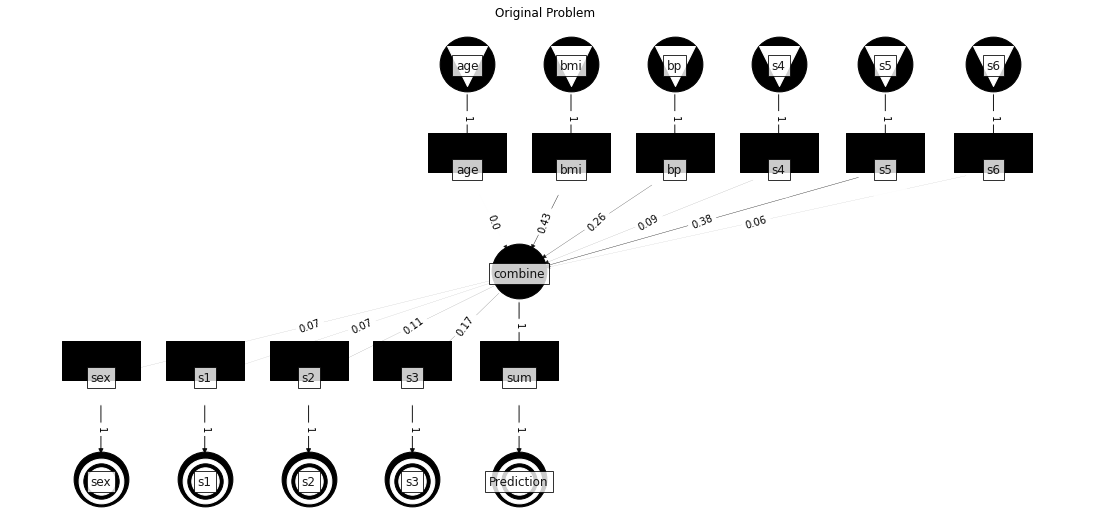

In [8]:
#### Step 2.1:  Plot Problem #####
ax1=P.plot_problem(figsize=(15,10), titlepos=1)
plt.show()
##################################

In [9]:
#### Step 3: Run ####
P.run()
####################

Installing wine dependencies (only for Linux), this may take longer for the first time. Use skip_wine=True if you are sure wine is installed.


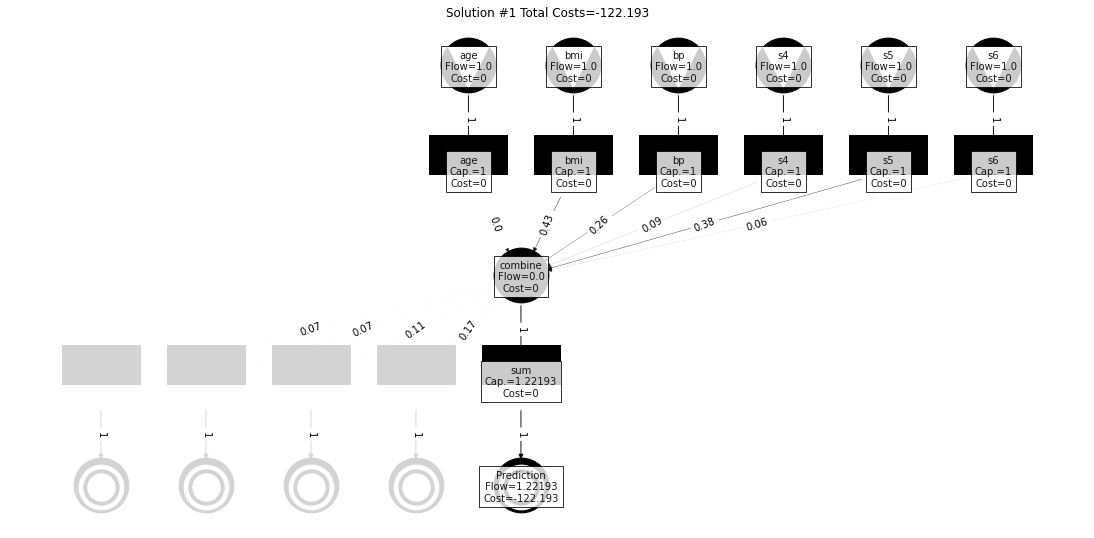

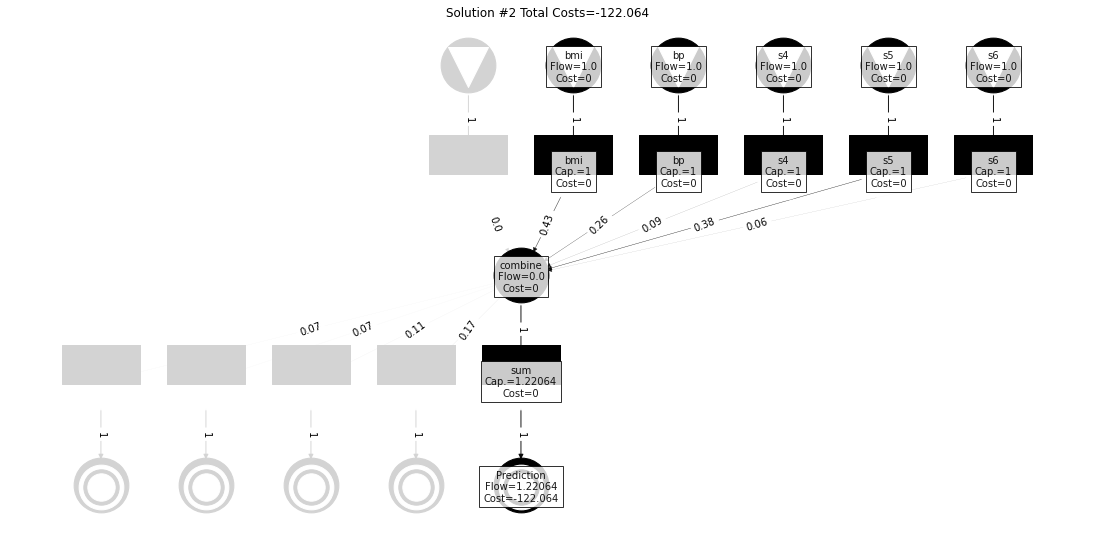

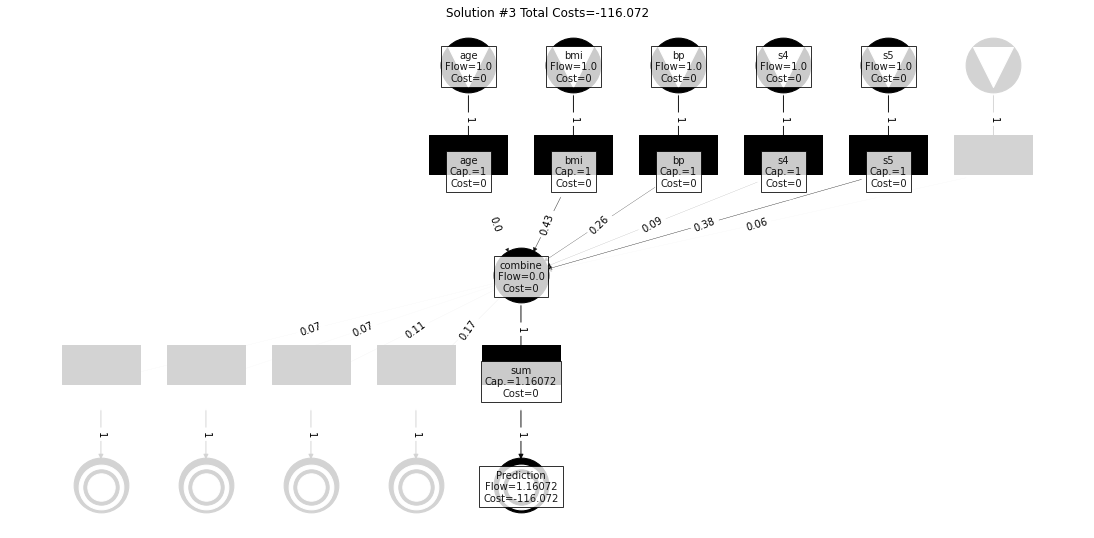

In [12]:
#### Step 3.1: Plot Solution########
for i in range(3): # Here we plot the 3 top solution
    ax=P.plot_solution(sol_num=i,figsize=(15,10), titlepos=1) #Plot Solution Function
    plt.show()
#####################################    

In [11]:
#### Step 3.2: Export to P-graph Studio ####
from google.colab import files #This is only for google colab
string = P.to_studio(path='./',verbose=False) #export to p-graph studio
files.download("./studio_file.pgsx") #download for google colab
############################################

#Note: Please be reminded to press "Generate Layout" button in P-graph Studio after opening

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>